In [1]:
import numpy as np

# Sigmoid activation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Forward pass: compute prediction and cost
def forward(params, X, Y):
    w = params["w"]
    w_0 = params["w_0"]
    n = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + w_0)
    cost = (-1 / n) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    return A, cost

# Backward pass: compute gradients
def backprop(X, Y, A):
    n = X.shape[1]

    dw = (1 / n) * np.dot(X, (A - Y).T)
    dw_0 = (1 / n) * np.sum(A - Y)

    return dw, dw_0

# Optimization loop
def optimize(params, X, Y, num_iterations, l_rate):
    costs = []

    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, dw_0 = backprop(X, Y, A)

        w = params["w"] - l_rate * dw
        params["w"] = w = w/np.linalg.norm(w)
        w_0 = params["w_0"] - l_rate * dw_0
        params["w_0"] = w_0 = w_0/np.linalg.norm(w)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, ||dw|| = {np.linalg.norm(dw):.4f}, dw_0 = {dw_0:.4f}")

        costs.append(cost)

    return params, costs

# Data: two points (1,1)->0 (cat), (3,3)->1 (dog)
X = np.array([[1, 3],
              [1, 3]])  # shape (2, 2)
Y = np.array([[0, 1]])  # shape (1, 2)

# Initialize weights and bias
w = np.random.randn(2, 1)
w = w/np.linalg.norm(w)
params = {
    "w": w,
    "w_0": 0.0
}

# Train model
trained_params, cost_history = optimize(params, X, Y, num_iterations=1000, l_rate=0.1)

# Final parameters
print("\nFinal weights and bias:")
print("w =", trained_params["w"].flatten())
print("w_0 =", trained_params["w_0"])


Iteration 0: Cost = 0.7296, ||dw|| = 0.4732, dw_0 = 0.3650
Iteration 100: Cost = 0.3174, ||dw|| = 0.0769, dw_0 = 0.1050
Iteration 200: Cost = 0.2347, ||dw|| = 0.1451, dw_0 = 0.0524
Iteration 300: Cost = 0.2185, ||dw|| = 0.2353, dw_0 = 0.0149
Iteration 400: Cost = 0.2177, ||dw|| = 0.2677, dw_0 = 0.0031
Iteration 500: Cost = 0.2176, ||dw|| = 0.2748, dw_0 = 0.0006
Iteration 600: Cost = 0.2176, ||dw|| = 0.2762, dw_0 = 0.0001
Iteration 700: Cost = 0.2176, ||dw|| = 0.2765, dw_0 = 0.0000
Iteration 800: Cost = 0.2176, ||dw|| = 0.2766, dw_0 = 0.0000
Iteration 900: Cost = 0.2176, ||dw|| = 0.2766, dw_0 = 0.0000

Final weights and bias:
w = [0.70710678 0.70710678]
w_0 = -2.828425654407108


||w|| = 1.000000
Signed distance from origin to boundary = -2.828426
Perpendicular distance from origin to boundary = 2.828426
Foot of perpendicular = (2.0000, 2.0000)


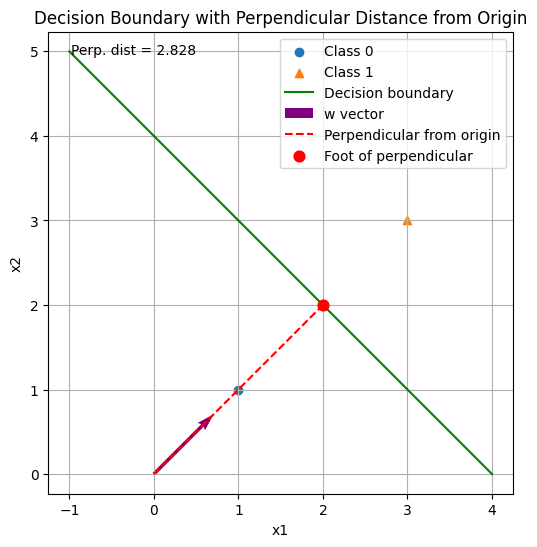

In [2]:
import matplotlib.pyplot as plt

# --- Extract trained parameters ---
w = trained_params["w"].reshape(-1)   # shape (2,)
w0 = float(trained_params["w_0"])

X_pts = X.T
Y_pts = Y.flatten()

# --- Distance and foot of perpendicular ---
w_norm = np.linalg.norm(w)
signed_dist = w0 / w_norm
perp_dist = abs(signed_dist)

foot = -(w0 / (w_norm**2)) * w

print(f"||w|| = {w_norm:.6f}")
print(f"Signed distance from origin to boundary = {signed_dist:.6f}")
print(f"Perpendicular distance from origin to boundary = {perp_dist:.6f}")
print(f"Foot of perpendicular = ({foot[0]:.4f}, {foot[1]:.4f})")

# --- Plot ---
plt.figure(figsize=(6,6))

# Data points
plt.scatter(X_pts[Y_pts==0,0], X_pts[Y_pts==0,1], label='Class 0', marker='o')
plt.scatter(X_pts[Y_pts==1,0], X_pts[Y_pts==1,1], label='Class 1', marker='^')

# Decision boundary: w1*x + w2*y + w0 = 0
x_vals = np.linspace(min(X_pts[:,0].min(), -1), max(X_pts[:,0].max(), 4), 200)
if abs(w[1]) > 1e-12:
    y_vals = -(w[0]*x_vals + w0)/w[1]
    plt.plot(x_vals, y_vals, 'g-', label='Decision boundary')
else:
    x_line = -w0 / w[0]
    plt.axvline(x_line, color='g', label='Decision boundary')

# Weight vector
plt.quiver(0, 0, w[0], w[1], angles='xy', scale_units='xy', scale=1, color='purple', label='w vector')

# Perpendicular
plt.plot([0, foot[0]], [0, foot[1]], 'r--', label='Perpendicular from origin')
plt.scatter([foot[0]], [foot[1]], s=60, color='red', zorder=5, label='Foot of perpendicular')

# Text annotation
plt.text(0.05, 0.95, f"Perp. dist = {perp_dist:.3f}", transform=plt.gca().transAxes)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary with Perpendicular Distance from Origin")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='best')
plt.show()
